In [2]:
 # Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as npy

In [3]:
file_one = "weather_data.csv"

In [4]:
 # Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [5]:
file_one_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95


In [6]:
file_one_df.set_index('City_ID')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95
...,...,...,...,...,...,...,...,...,...
542,scalea,36,IT,1528905631,100,39.82,15.79,70.06,5.30
543,san andres,68,PH,1528905632,100,13.32,122.68,83.47,22.64
544,muisne,92,EC,1528905633,84,0.61,-80.02,76.90,4.63


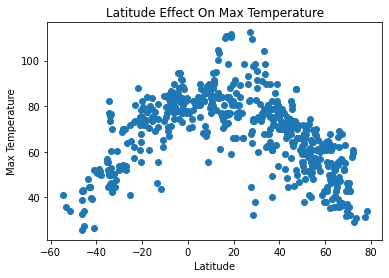

In [7]:
latitude = file_one_df.Lat
temp = file_one_df.Max_Temp
plt.scatter(latitude,temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude Effect On Max Temperature")
filepath = '..\Assets\lat_temp_viz1'
#plt.savefig(filepath, dpi=None,format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)
plt.show()

In [8]:
latitude.corr(temp)

-0.16745995447365614

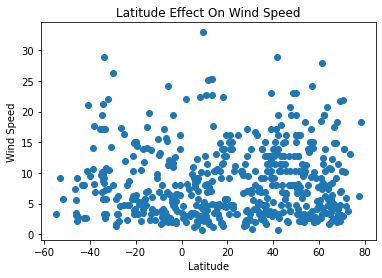

In [9]:
latitude = file_one_df.Lat
ws = file_one_df.Wind_Speed
plt.scatter(latitude,ws)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Effect On Wind Speed")
filepath = '..\Assets\lat_ws_viz2'
#plt.savefig(filepath, dpi=None,format=None,
#       transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)
plt.show()

In [10]:
latitude.corr(ws)

0.02469781423197101

In [11]:
# Create bins
bins = [-90, -60, -30, 0, 30, 60, 90]

# Create labels for these bins
group_labels = ["Extreme Southern", "Lower Southern", "Equatorial Southern", 
                "Equatorial Northern", "Upper Northern", "Extreme Northern"]

In [12]:
# Slice the data and place it into bins
pd.cut(file_one_df["Lat"], bins, labels=group_labels)

0      Equatorial Southern
1           Lower Southern
2           Lower Southern
3           Upper Northern
4         Extreme Northern
              ...         
542         Upper Northern
543    Equatorial Northern
544    Equatorial Northern
545    Equatorial Northern
546         Lower Southern
Name: Lat, Length: 547, dtype: category
Categories (6, object): [Extreme Southern < Lower Southern < Equatorial Southern < Equatorial Northern < Upper Northern < Extreme Northern]

In [13]:
# Place the data series into a new column inside of the DataFrame
file_one_df["Latitude_Classification"] = pd.cut(file_one_df["Lat"], bins, labels=group_labels)
#file_two = file_one_df.drop(columns=['Latitude Classification'])
#file_two.head()

In [14]:
# Create a GroupBy object based upon "Latitude Classification"
lat_mean = file_one_df.groupby(['Latitude_Classification'])[['Max_Temp']].mean()
lat_mean = lat_mean.reset_index()
lat_mean
#weather_groupby = file_two.groupby("Latitude_Classification").to_frame()
#weather_groupby
# Find how many rows fall into each bin
#print(weather_groupby["Latitude_Classification"].count())

# Get the average of each column within the GroupBy object
#temp_mean = ['name', 'id', 'dept'])['total_sale'].mean().to_frame()
#temp_mean


,Latitude_Classification,Max_Temp
0,Extreme Southern,NaN
1,Lower Southern,49.033077
2,Equatorial Southern,74.687207
3,Equatorial Northern,81.689375
4,Upper Northern,67.496389
5,Extreme Northern,48.415526


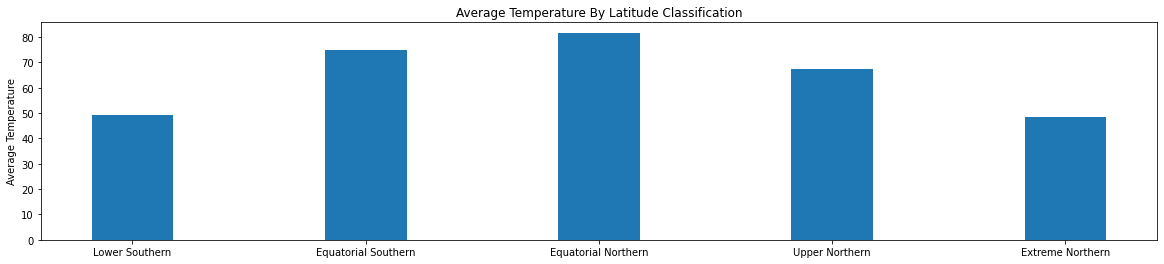

In [15]:
latgroup = lat_mean["Latitude_Classification"]
mtemp = lat_mean["Max_Temp"]
width=(0.35)
plt.figure(figsize=(20,4))
plt.bar(latgroup,mtemp,width)
plt.ylabel("Average Temperature")
plt.title("Average Temperature By Latitude Classification")
filepath = '..\Assets\lat_temp_viz3'
#plt.savefig(filepath, dpi=None,format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)
plt.show()

In [16]:
lat_mean_hum = file_one_df.groupby(['Latitude_Classification'])[['Humidity']].mean()
lat_mean_hum = lat_mean_hum.reset_index()
lat_mean_hum

,Latitude_Classification,Humidity
0,Extreme Southern,NaN
1,Lower Southern,78.346154
2,Equatorial Southern,71.675676
3,Equatorial Northern,74.757812
4,Upper Northern,63.638889
5,Extreme Northern,71.407895


<ipython-input-19-8811c4b32e57>:9: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  plt.savefig(filepath, dpi=None,format=None,


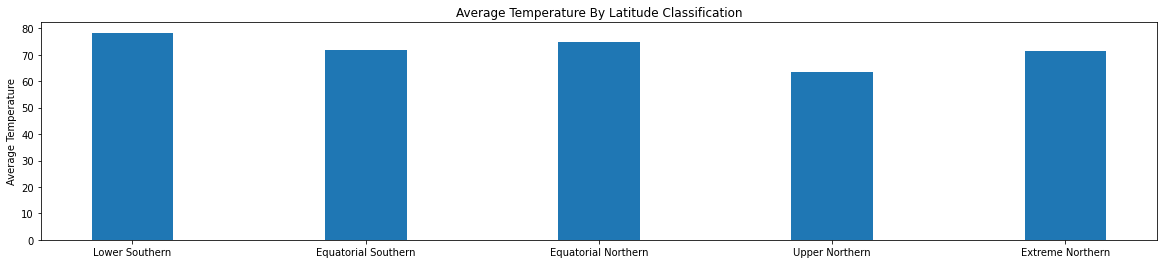

In [19]:
latgroup_hum = lat_mean_hum["Latitude_Classification"]
mhum = lat_mean_hum["Humidity"]
width=(0.35)
plt.figure(figsize=(20,4))
plt.bar(latgroup_hum,mhum,width)
plt.ylabel("Average Temperature")
plt.title("Average Temperature By Latitude Classification")
filepath = '..\Assets\lat_hum_viz4'
plt.savefig(filepath, dpi=None,format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()